# **Bubble Plots**



The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [ ]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-05-05 10:36:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  51.7MB/s    in 2.9s    

2025-05-05 10:36:13 (51.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [ ]:
print(df['Age'].unique(),
df['SOPartFreq'].unique(),
df['JobSat'].unique()
)

['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older'] [nan 'Multiple times per day' 'Daily or almost daily'
 'Less than once per month or monthly' 'A few times per week'
 'A few times per month or weekly'
 'I have never participated in Q&A on Stack Overflow'] [nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


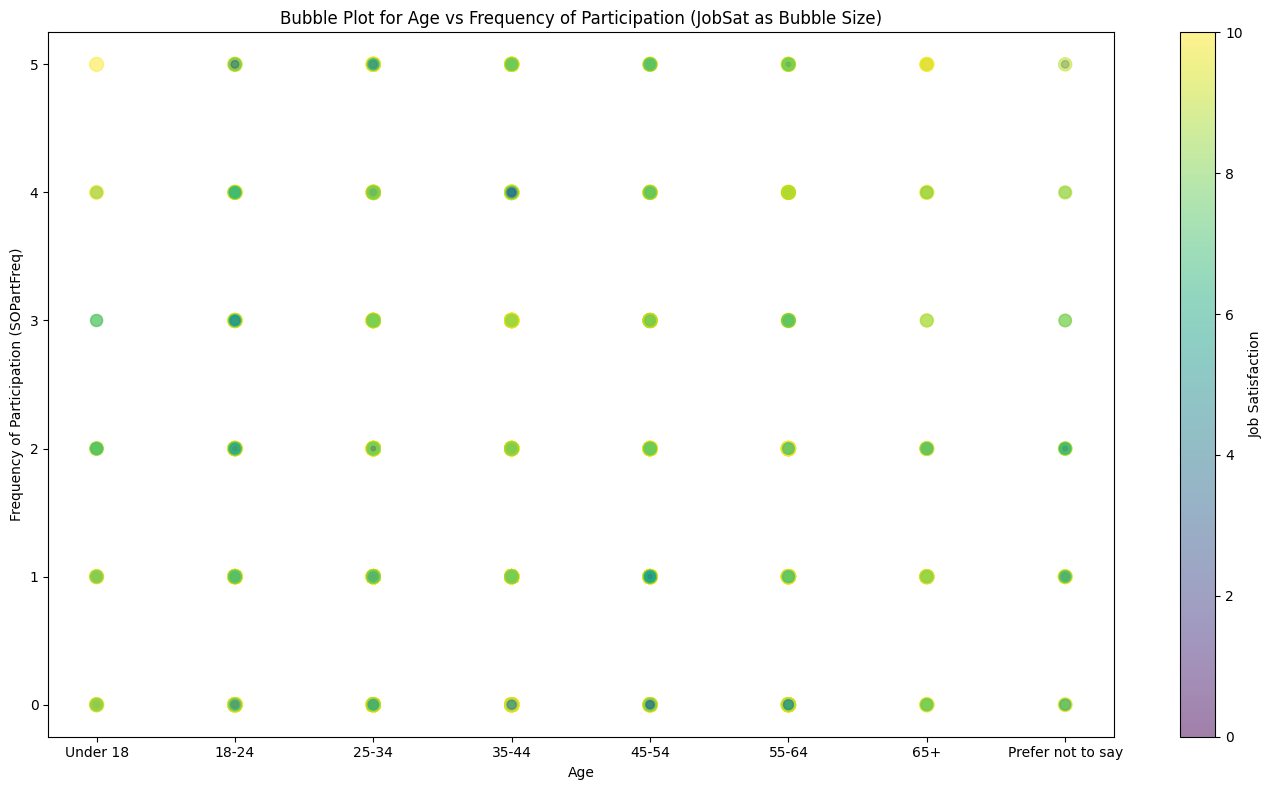

In [ ]:
##Write your code here
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Mapping participation frequency to numeric values (adjust based on what makes sense for your data)
participation_mapping = {
    'I have never participated in Q&A on Stack Overflow': 0,
    'Less than once per month or monthly': 1,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}

# Apply mappings
df['Age_numeric'] = df['Age'].map(age_mapping)
df['SOPartFreq_numeric'] = df['SOPartFreq'].map(participation_mapping)

# Ensure JobSat is numeric
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows with missing values in 'Age_numeric', 'SOPartFreq_numeric', or 'JobSat'
df_bubble = df.dropna(subset=['Age_numeric', 'SOPartFreq_numeric', 'JobSat'])

# Plotting the bubble plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=df_bubble['Age_numeric'],
    y=df_bubble['SOPartFreq_numeric'],
    s=df_bubble['JobSat'] * 10,  # Bubble size based on JobSat (scaled for visibility)
    alpha=0.5,  # Transparency of the bubbles
    c=df_bubble['JobSat'],  # Color by JobSat (job satisfaction)
    cmap='viridis'  # Color map for job satisfaction
)

# Adding plot details
plt.title('Bubble Plot for Age vs Frequency of Participation (JobSat as Bubble Size)')
plt.xlabel('Age')
plt.ylabel('Frequency of Participation (SOPartFreq)')
plt.colorbar(label='Job Satisfaction')  # Colorbar to indicate job satisfaction levels
plt.xticks(ticks=range(8), labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+', 'Prefer not to say'])
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


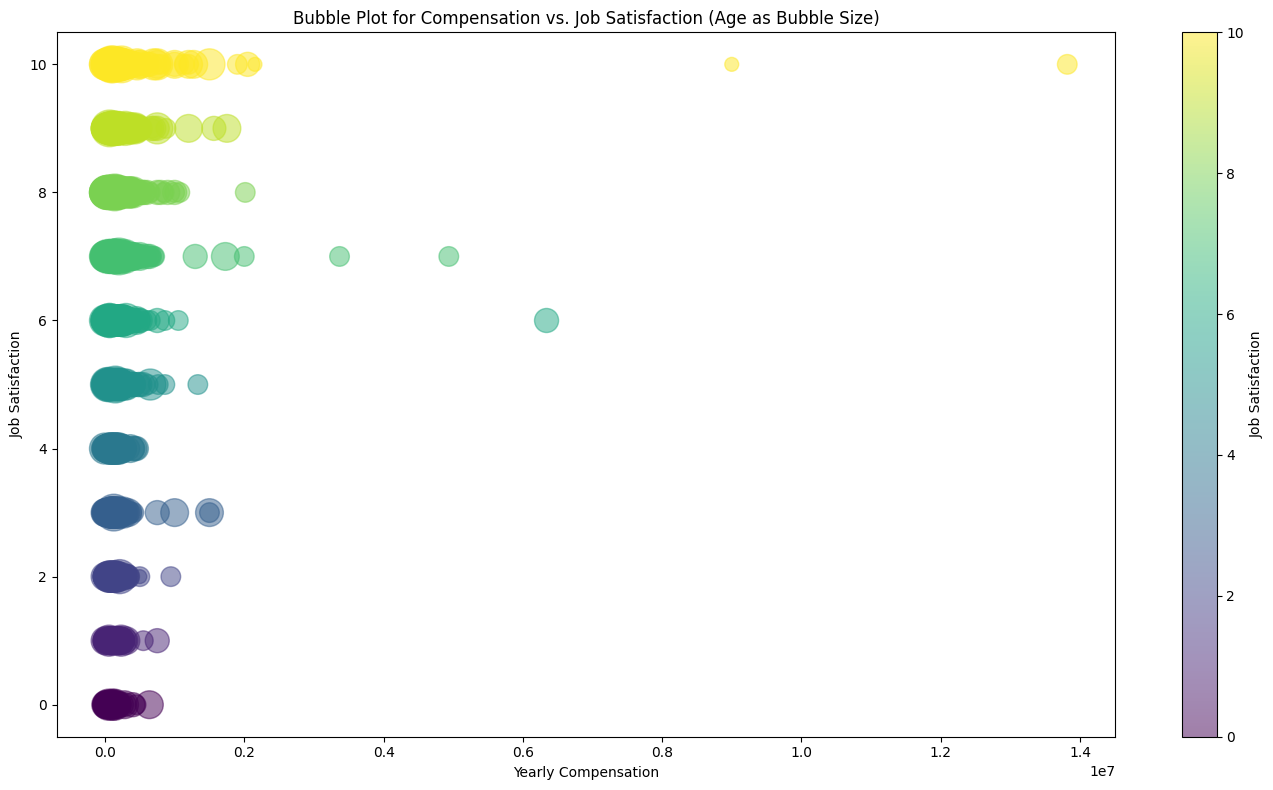

In [ ]:
##Write your code here
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Apply the mapping for Age if necessary
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows with missing values in relevant columns for plotting
df_bubble = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age_numeric'])

# Bubble plot
plt.figure(figsize=(14, 8))

# Plotting the scatter plot with bubble size as Age and color as JobSat
plt.scatter(
    x=df_bubble['ConvertedCompYearly'],  # X-axis: Yearly Compensation
    y=df_bubble['JobSat'],               # Y-axis: Job Satisfaction
    s=df_bubble['Age_numeric'] * 100,    # Bubble size: Age (scaled for visibility)
    alpha=0.5,                           # Transparency for better visualization
    c=df_bubble['JobSat'],               # Color by Job Satisfaction
    cmap='viridis'                       # Colormap for Job Satisfaction
)

# Adding plot details
plt.title('Bubble Plot for Compensation vs. Job Satisfaction (Age as Bubble Size)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.colorbar(label='Job Satisfaction')  # Color bar to indicate Job Satisfaction levels
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [ ]:
print(df['LanguageHaveWorkedWith'].value_counts())

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                            1002
Python                                                     832
HTML/CSS;JavaScript;PHP;SQL                                503
HTML/CSS;JavaScript                                        452
C#                                                         452
                                                          ... 
C;C++;Python;Swift;TypeScript                                1
Bash/Shell (all shells);C;C#;C++;Python;SQL;TypeScript       1
C#;Perl;PowerShell;SQL;Visual Basic (.Net)                   1
Bash/Shell (all shells);Clojure;Scala;SQL                    1
C++;Dart;Fortran;Haskell;HTML/CSS;Java;JavaScript            1
Name: count, Length: 23864, dtype: int64


<ipython-input-13-04ba2b95b0db>:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  freq = len(df[(df['LanguageHaveWorkedWith'].str.contains(language)) & (df['Age_numeric'] == age_group)])


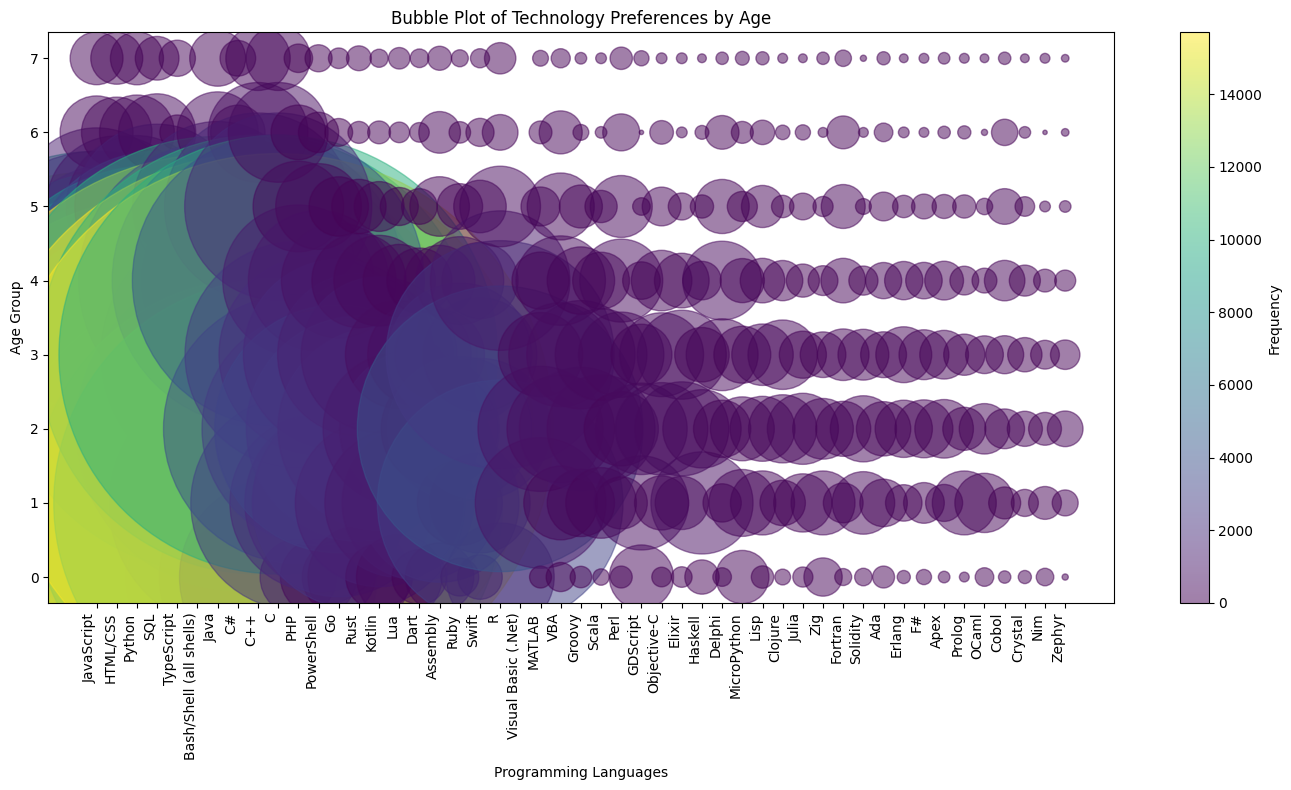

In [ ]:
##Write your code here
languages_split = df['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
languages_freq = languages_split.value_counts()

# Define the age mapping (assuming 'Age' is already in categories like '18-24 years old', etc.)
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Map Age to numeric values
df['Age_numeric'] = df['Age'].map(age_mapping)

# Initialize an empty list to hold the rows for the new DataFrame
rows = []

# Iterate over the rows to populate the new dataframe
for language in languages_freq.index:
    for age_group in age_mapping.values():
        freq = len(df[(df['LanguageHaveWorkedWith'].str.contains(language)) & (df['Age_numeric'] == age_group)])
        rows.append({'Language': language, 'Age': age_group, 'Frequency': freq})

# Create a DataFrame from the list of rows
languages_by_age = pd.DataFrame(rows)

# Bubble plot visualization
plt.figure(figsize=(14, 8))

# Bubble plot with language on x-axis, age group on y-axis, and bubble size representing frequency
plt.scatter(
    x=languages_by_age['Language'],  # X-axis: Programming Languages
    y=languages_by_age['Age'],       # Y-axis: Age Groups
    s=languages_by_age['Frequency'] * 10,  # Bubble size: Frequency
    alpha=0.5,                      # Transparency for better visualization
    c=languages_by_age['Frequency'],  # Color by Frequency for better distinction
    cmap='viridis'                  # Colormap for Frequency
)

# Customizing plot
plt.title('Bubble Plot of Technology Preferences by Age')
plt.xlabel('Programming Languages')
plt.ylabel('Age Group')
plt.xticks(rotation=90, ha='right')  # Rotate language labels for better readability
plt.colorbar(label='Frequency')  # Add a color bar to indicate frequency
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [ ]:
print(df['DatabaseWantToWorkWith'].value_counts())

DatabaseWantToWorkWith
PostgreSQL                                                         3738
PostgreSQL;SQLite                                                  1533
SQLite                                                             1476
Microsoft SQL Server                                               1431
MySQL                                                              1139
                                                                   ... 
Elasticsearch;Microsoft SQL Server;MongoDB;Solr;SQLite                1
MariaDB;MongoDB;MySQL;Neo4J;Redis;Snowflake                           1
Clickhouse;Dynamodb;Elasticsearch;MySQL;PostgreSQL                    1
H2;MySQL;Oracle;Snowflake                                             1
Cassandra;Cockroachdb;Elasticsearch;H2;InfluxDB;Neo4J;Snowflake       1
Name: count, Length: 8478, dtype: int64


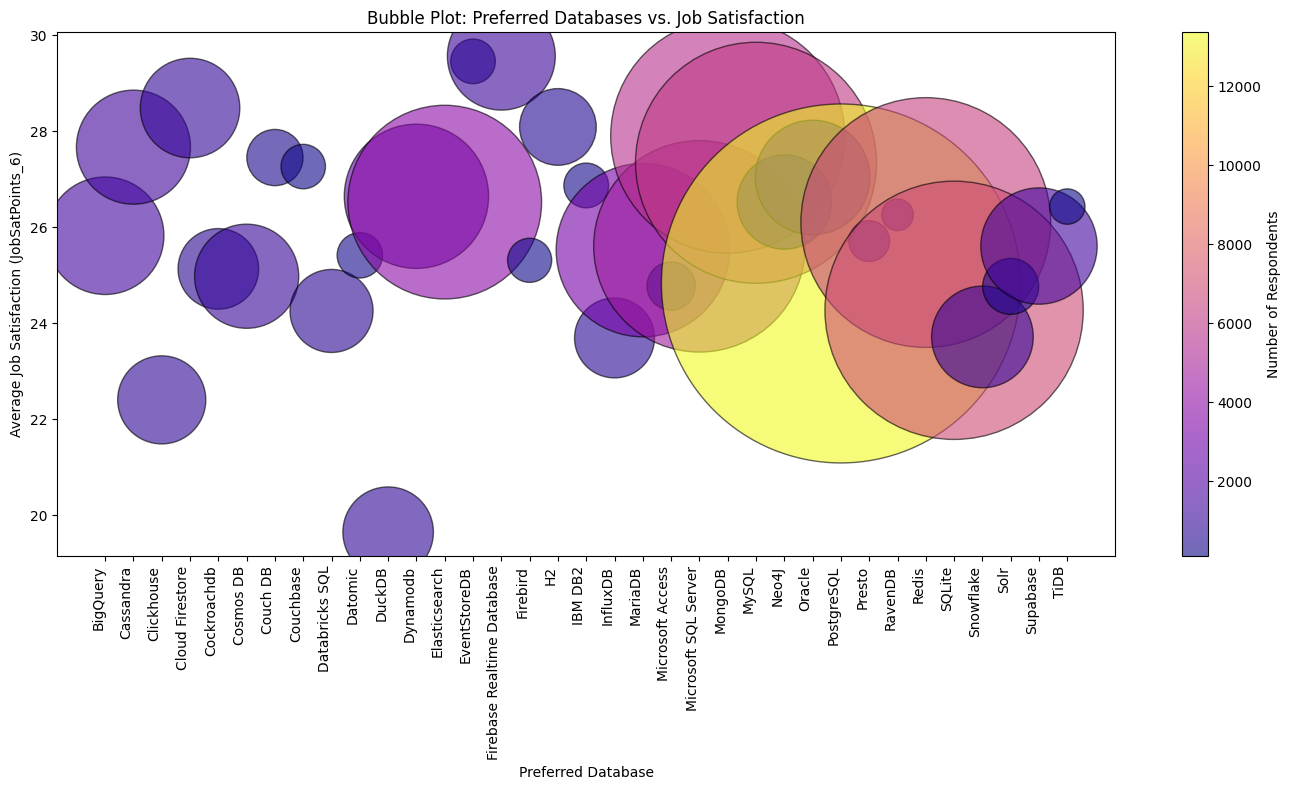

In [ ]:
##Write your code here
df_filtered = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSatPoints_6'])

# Split multiple databases into separate rows
db_expanded = df_filtered['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_db = df_filtered.drop(columns=['DatabaseWantToWorkWith']).join(db_expanded.rename('Database'))

# Group by database and calculate:
# - Average job satisfaction
# - Count of respondents
db_stats = df_db.groupby('Database').agg({
    'JobSatPoints_6': 'mean',
    'Database': 'count'
}).rename(columns={'Database': 'Respondents'}).reset_index()

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=db_stats['Database'],
    y=db_stats['JobSatPoints_6'],
    s=db_stats['Respondents'] * 5,
    alpha=0.6,
    c=db_stats['Respondents'],
    cmap='plasma',
    edgecolors='black'
)

plt.title('Bubble Plot: Preferred Databases vs. Job Satisfaction')
plt.xlabel('Preferred Database')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.xticks(rotation=90, ha='right')
plt.colorbar(label='Number of Respondents')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [ ]:
print(df['DevType'].value_counts())

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

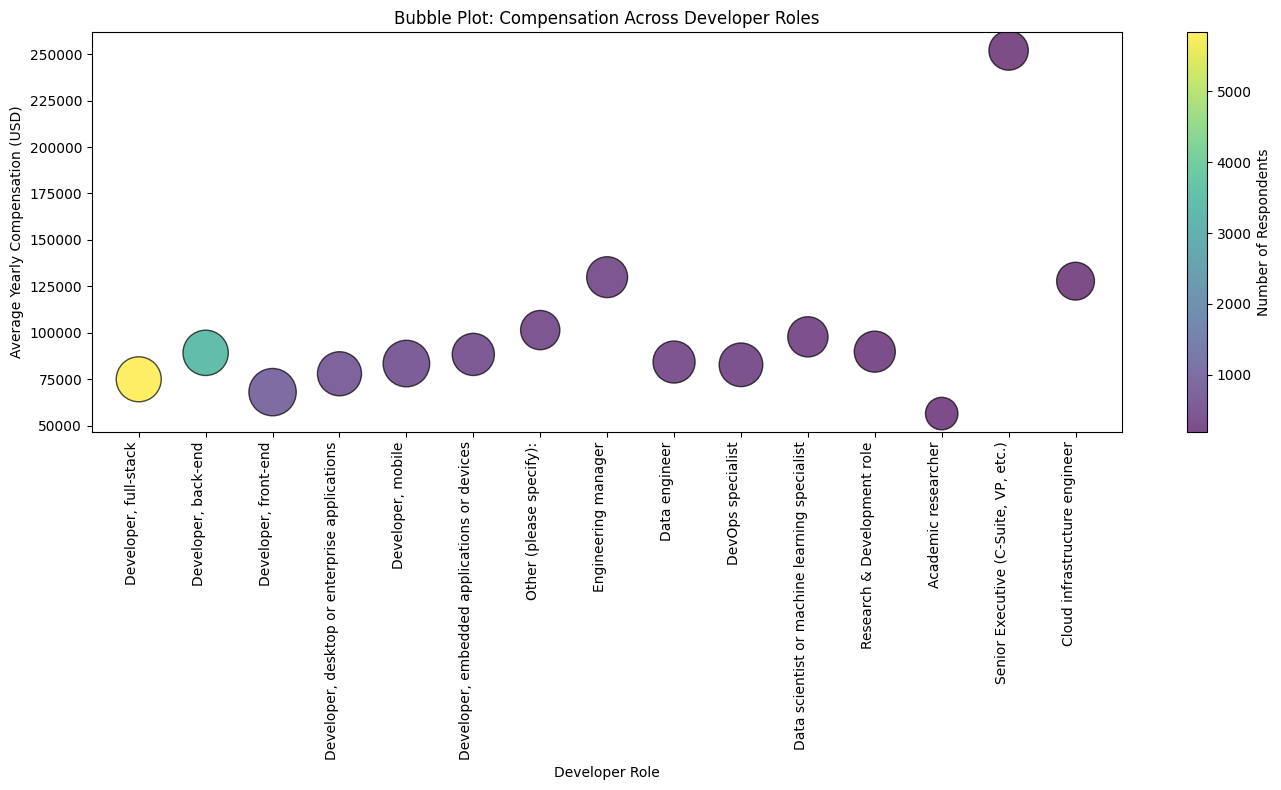

In [ ]:
##Write your code here
df_filtered = df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Split multiple roles into separate rows
dev_expanded = df_filtered['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_dev = df_filtered.drop(columns=['DevType']).join(dev_expanded.rename('DevRole'))

# Group by developer role
dev_stats = df_dev.groupby('DevRole').agg({
    'ConvertedCompYearly': 'mean',
    'JobSatPoints_6': 'mean',
    'DevRole': 'count'
}).rename(columns={'DevRole': 'Respondents'}).reset_index()

# Filter top 15 roles by number of respondents (optional)
top_roles = dev_stats.sort_values('Respondents', ascending=False).head(15)

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=top_roles['DevRole'],
    y=top_roles['ConvertedCompYearly'],
    s=top_roles['JobSatPoints_6'] * 40,  # bubble size
    c=top_roles['Respondents'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='black'
)

plt.title('Bubble Plot: Compensation Across Developer Roles')
plt.xlabel('Developer Role')
plt.ylabel('Average Yearly Compensation (USD)')
plt.xticks(rotation=90, ha='right')
plt.colorbar(label='Number of Respondents')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [ ]:
print(df['NEWCollabToolsHaveWorkedWith'].value_counts())

NEWCollabToolsHaveWorkedWith
Visual Studio Code                                                            6154
Visual Studio;Visual Studio Code                                              2546
Notepad++;Visual Studio;Visual Studio Code                                    1543
IntelliJ IDEA;Visual Studio Code                                              1169
Vim;Visual Studio Code                                                        1045
                                                                              ... 
Eclipse;Netbeans;Visual Studio;Visual Studio Code;WebStorm                       1
Nano;Rider;Sublime Text;Visual Studio Code;Xcode                                 1
DataGrip;Eclipse;IntelliJ IDEA;Notepad++;Visual Studio;Visual Studio Code        1
Android Studio;Helix;Xcode                                                       1
Android Studio;CLion;DataGrip;Fleet;IntelliJ IDEA;Visual Studio Code;Xcode       1
Name: count, Length: 14168, dtype: int64


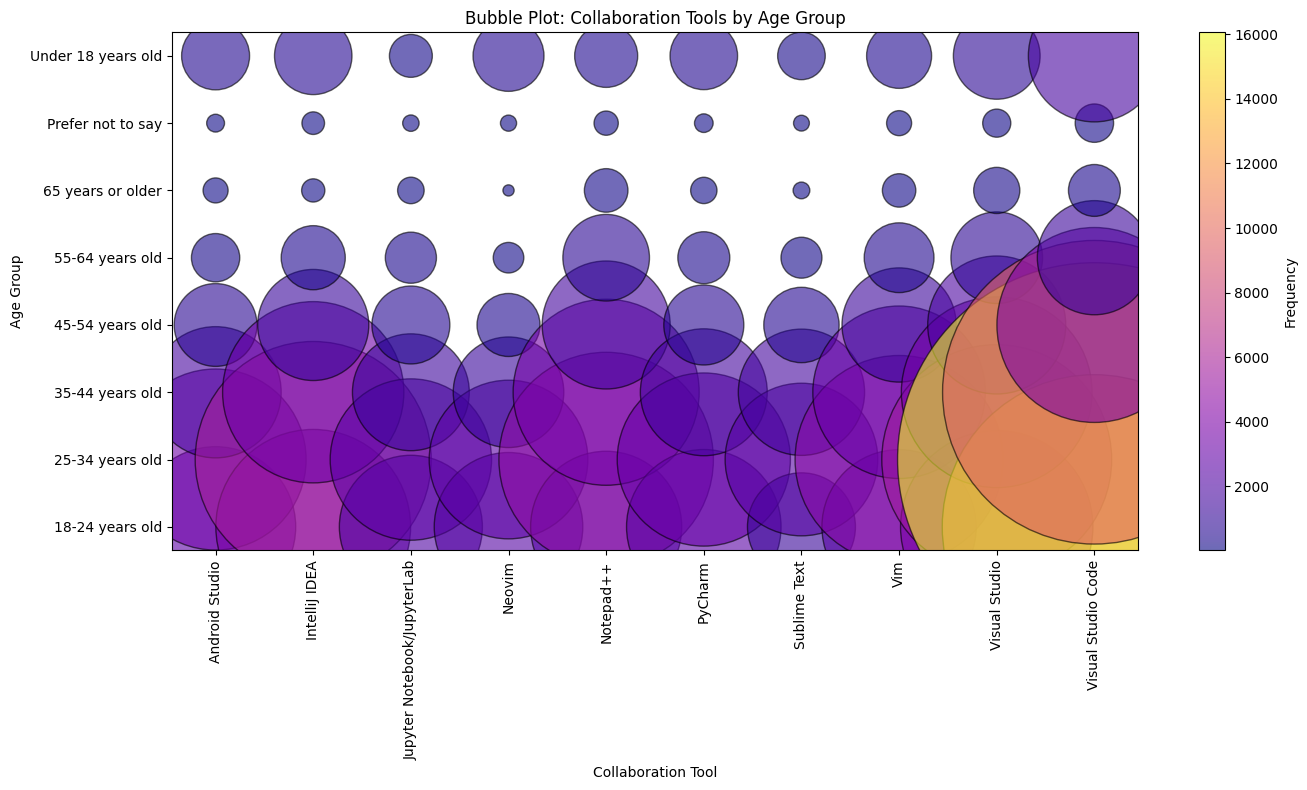

In [ ]:
##Write your code here
df_tools = df.dropna(subset=['NEWCollabToolsHaveWorkedWith', 'Age'])

# Split semicolon-separated tools into rows
df_expanded = df_tools.assign(
    Tool=df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
).explode('Tool')

# Group by Tool and Age
grouped = df_expanded.groupby(['Tool', 'Age']).size().reset_index(name='Frequency')

# Filter top 10 tools (optional)
top_tools = grouped.groupby('Tool')['Frequency'].sum().nlargest(10).index
filtered = grouped[grouped['Tool'].isin(top_tools)]

# Plot
plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=filtered['Tool'],
    y=filtered['Age'],
    s=filtered['Frequency'] * 5,
    alpha=0.6,
    c=filtered['Frequency'],
    cmap='plasma',
    edgecolors='black'
)

plt.title('Bubble Plot: Collaboration Tools by Age Group')
plt.xlabel('Collaboration Tool')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.colorbar(label='Frequency')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
print(df['WebframeWantToWorkWith'].value_counts())

WebframeWantToWorkWith
React                                                 997
Spring Boot                                           950
Node.js                                               619
ASP.NET CORE                                          607
FastAPI                                               576
                                                     ... 
Express;Fastify;Flask;NestJS                            1
Angular;Node.js;Nuxt.js;Spring Boot;Symfony;Vue.js      1
Deno;FastAPI;Fastify;Htmx                               1
Flask;Laravel;Solid.js                                  1
ASP.NET;ASP.NET CORE;Deno;Express;NestJS;Node.js        1
Name: count, Length: 11654, dtype: int64


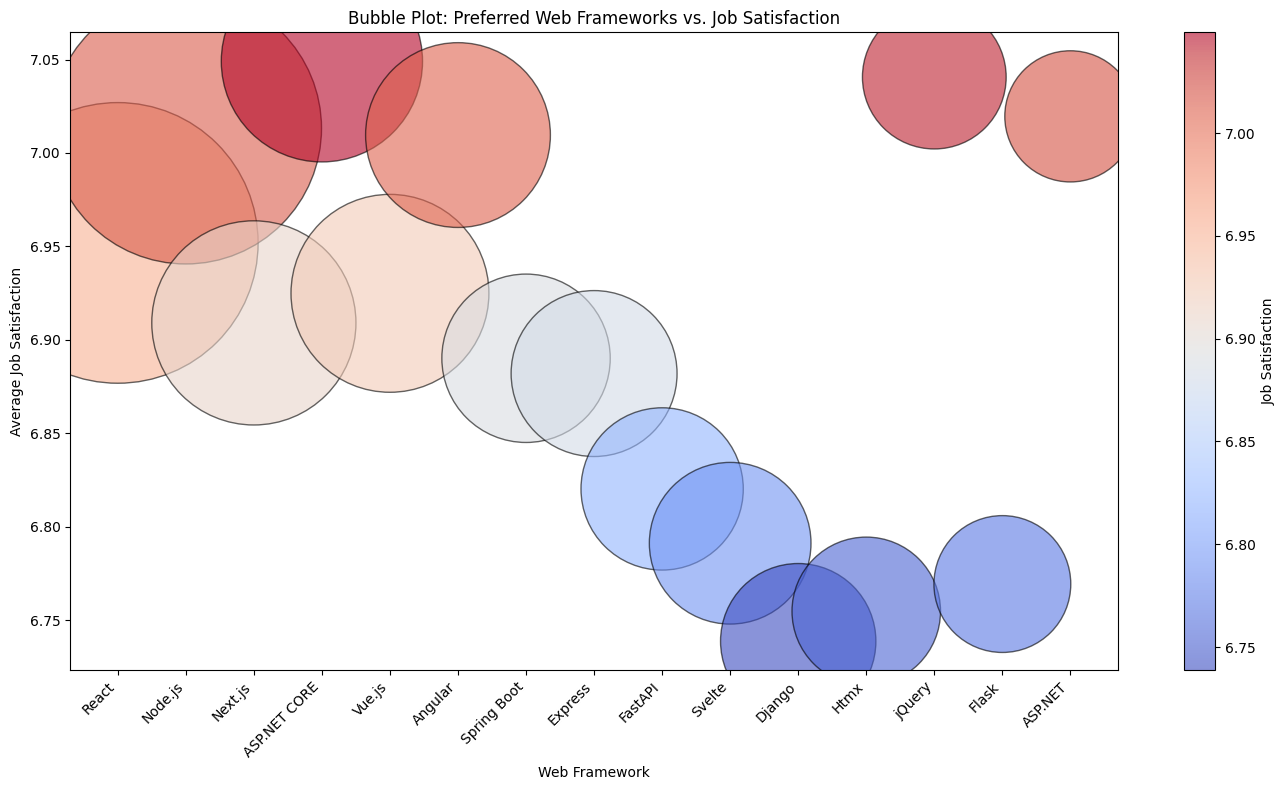

In [ ]:
##Write your code here
df_clean = df.dropna(subset=['WebframeWantToWorkWith', 'JobSat'])

# Split frameworks into rows
df_expanded = df_clean.assign(
    WebFramework=df_clean['WebframeWantToWorkWith'].str.split(';')
).explode('WebFramework')

# Group by framework: get mean JobSat and count
framework_stats = df_expanded.groupby('WebFramework').agg({
    'JobSat': 'mean',
    'WebFramework': 'count'
}).rename(columns={'WebFramework': 'RespondentCount'}).reset_index()

# Plot bubble plot for top 15 most mentioned frameworks
top_frameworks = framework_stats.nlargest(15, 'RespondentCount')

plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=top_frameworks['WebFramework'],
    y=top_frameworks['JobSat'],
    s=top_frameworks['RespondentCount'] * 5,  # bubble size
    alpha=0.6,
    c=top_frameworks['JobSat'],
    cmap='coolwarm',
    edgecolors='black'
)

plt.title('Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction')
plt.xlabel('Web Framework')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.colorbar(label='Job Satisfaction')
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
print(df['LanguageAdmired'].value_counts())
print(df['Country'].value_counts())

LanguageAdmired
Python                                                                1555
HTML/CSS;JavaScript;TypeScript                                        1058
C#                                                                     892
Python;SQL                                                             669
Java                                                                   583
                                                                      ... 
C#;C++;PowerShell;TypeScript                                             1
Assembly;Bash/Shell (all shells);C;HTML/CSS;Java;Python;Rust             1
Bash/Shell (all shells);HTML/CSS;Lua;Python;Rust                         1
Bash/Shell (all shells);Go;HTML/CSS;JavaScript;Kotlin;Python;Swift       1
C;Go;JavaScript;Python;Rust;SQL;TypeScript                               1
Name: count, Length: 12335, dtype: int64
Country
United States of America                                11095
Germany                                         

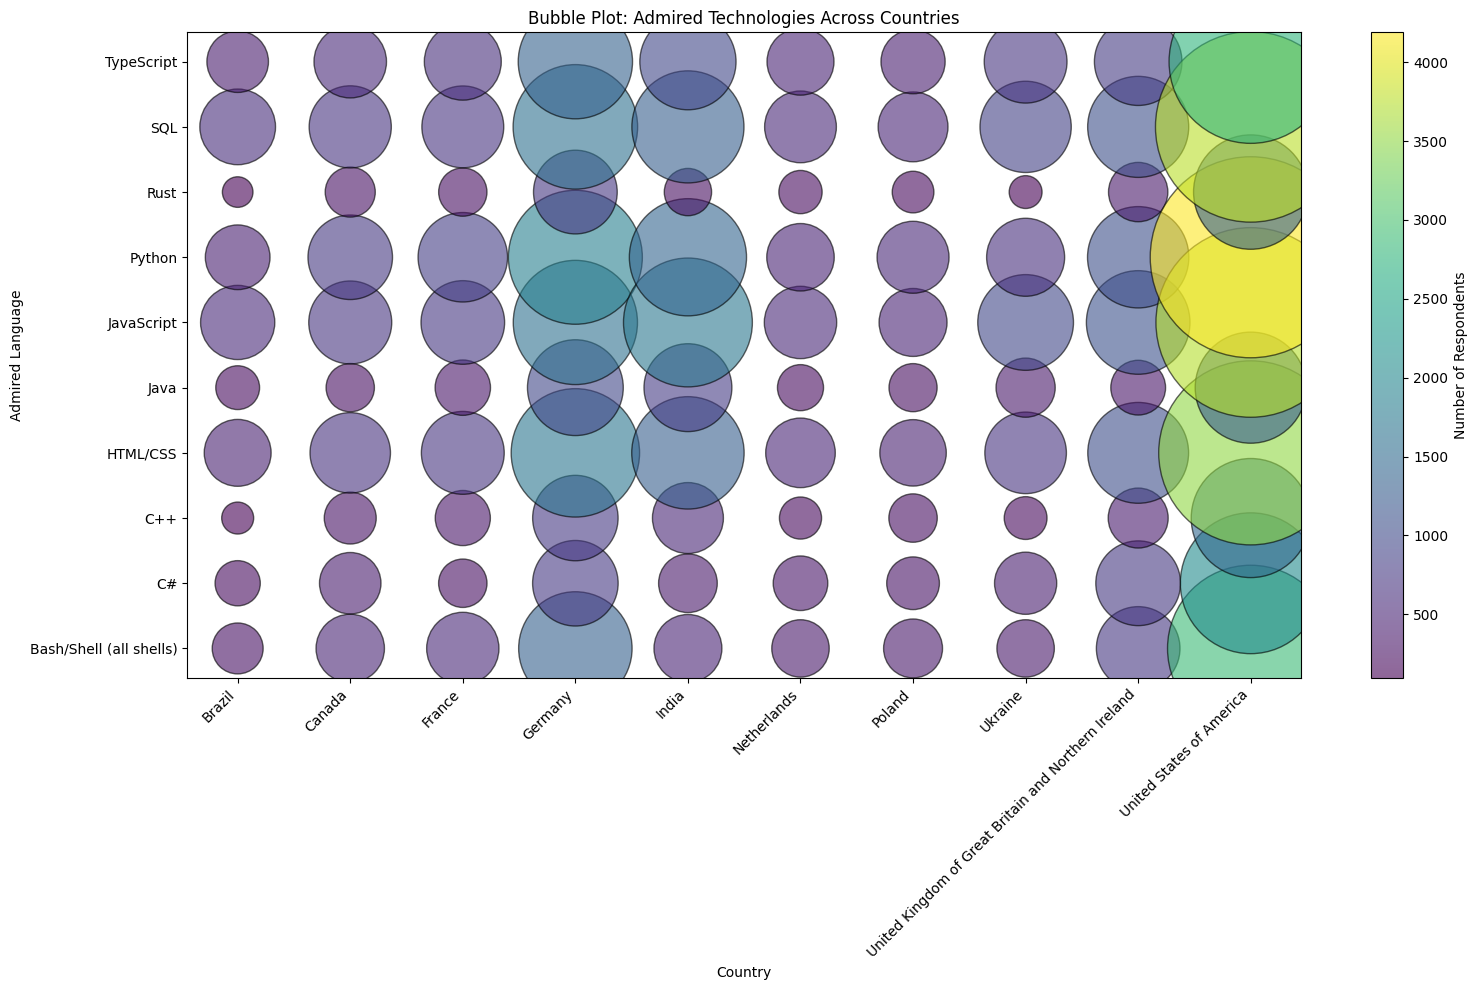

In [ ]:
##Write your code here
df_filtered = df.dropna(subset=['LanguageAdmired', 'Country'])

# Split the admired languages into separate rows
df_expanded = df_filtered.assign(
    Language=df_filtered['LanguageAdmired'].str.split(';')
).explode('Language')

# Group by Country and Language to get counts
lang_country_counts = df_expanded.groupby(['Country', 'Language']).size().reset_index(name='Count')

# Keep only top 10 countries by respondent count
top_countries = df['Country'].value_counts().head(10).index
lang_country_counts = lang_country_counts[lang_country_counts['Country'].isin(top_countries)]

# Keep only top 10 admired languages overall
top_languages = df_expanded['Language'].value_counts().head(10).index
lang_country_counts = lang_country_counts[lang_country_counts['Language'].isin(top_languages)]

# Plotting
plt.figure(figsize=(16, 10))
bubble = plt.scatter(
    x=lang_country_counts['Country'],
    y=lang_country_counts['Language'],
    s=lang_country_counts['Count'] * 5,  # Adjust bubble size
    alpha=0.6,
    c=lang_country_counts['Count'],
    cmap='viridis',
    edgecolors='black'
)

plt.title('Bubble Plot: Admired Technologies Across Countries')
plt.xlabel('Country')
plt.ylabel('Admired Language')
plt.xticks(rotation=45, ha='right')
plt.colorbar(label='Number of Respondents')
plt.tight_layout()
plt.show()